# Make your own present-day agegrid globe!

Why keep the present-day agegrid on computer, when you can print it out and have a pseudo-globe on your desk! Some of this is inspired by posts such as [here](https://www.esri.com/arcgis-blog/products/arcgis-pro/mapping/make-this-dymaxion-globe-ornament-please/) and [here](https://adventuresinmapping.com/2020/12/07/make-this-cassini-globe-ornament-please/).

Here we use latest and greatest present-day agegrid from [Seton et al. (2020)](https://doi.org/10.1029/2020GC009214), which you can download from [the earthbyte website](https://www.earthbyte.org/webdav/ftp/earthbyte/agegrid/2020/). Or now you can magically download it with [GMT](https://docs.generic-mapping-tools.org/latest/datasets/remote-data.html)!


In [8]:
import pygmt
# from gplately import pygplates 
# import gplately

Set up locations to files. You could use some GMT @ magic to call the files as well, since it *should* work (but I can just never remember the commadns)
I already had these files on my laptop... 

It would be cool to illuminate the oceanic crust using [ETOPO](https://www.ncei.noaa.gov/products/etopo-global-relief-model). This really highlights some seafloor features, like seamount chains and fracture zones.

In [40]:
## files on my laptop
agegrid_S20 = '/Users/nickywright/Data/Age/Seton++_2020/age.2020.1.GeeK2007.2m.nc'
etopo = '/Users/nickywright/Data/Bathymetry_Topography/ETOPO/ETOPO_2022_v1_60s_N90W180_surface.nc'

In [ ]:
# %%bash -s $etopo $agegrid_S20

# # check resolution, and lazily resample ETOPO if we need. OR we could just download the higher res agegrid!
# gmt grdinfo $2

# gmt grdinfo $1

# # regrid etopo to be 2min
# gmt grdsample $1 -I2m -R-180/180/-90/90 -Getopo_2m.nc -T

# gmt grdinfo etopo_2m.nc  # check to make sure it's the same size/grid type as the agegrid

## Plot!

Using [pygmt](https://www.pygmt.org/latest/index.html) or your favourite plotting program.

Note: we **don't** want any edges on this, because no one likes ugly borders through the Pacific Ocean.
We *could* also use `gplately` and get present-day plate boundaries if we wanted though!

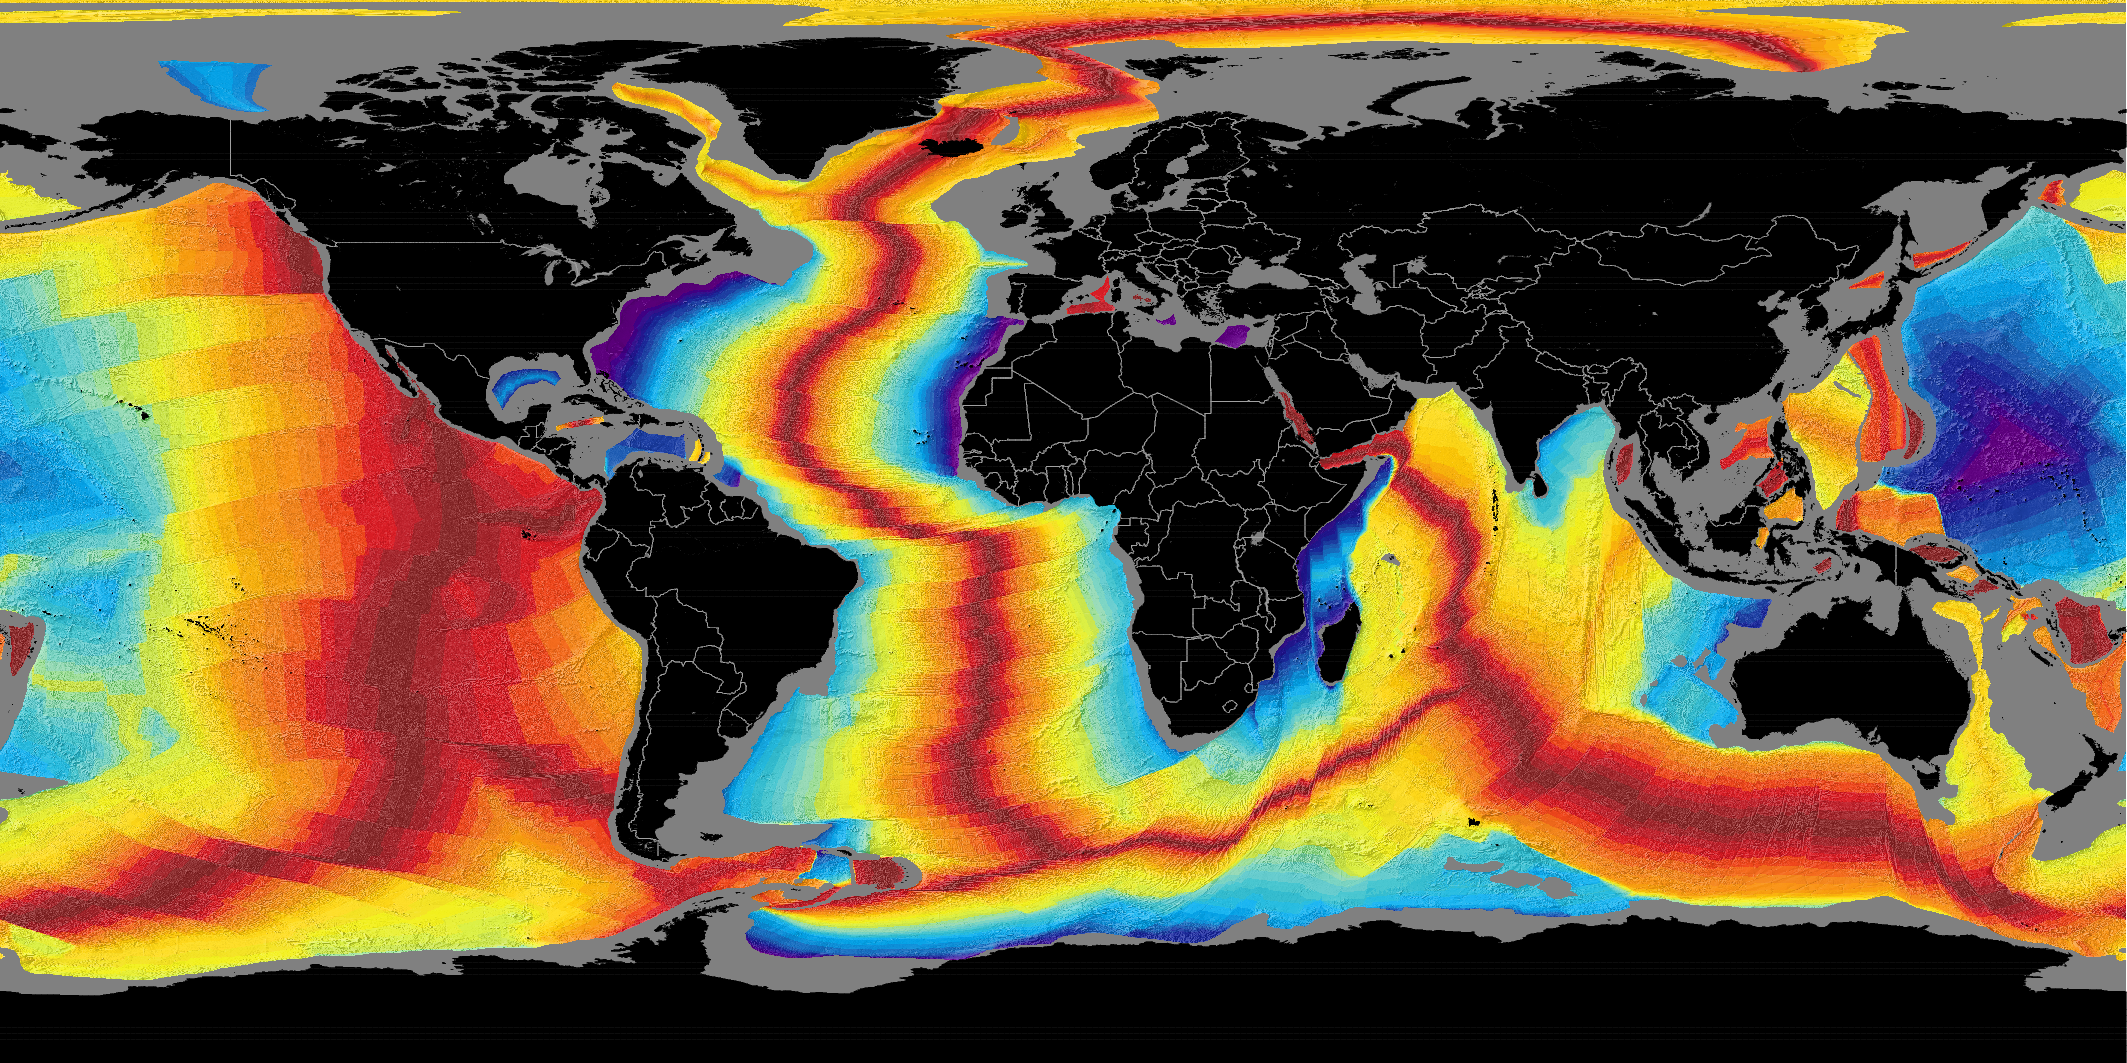

In [42]:
# ----- parameters for plot
region = 'd'
width = '18/9'
projection = 'X'

# plate boundary stuff - not being used
plateboundary_width = '0.5p'
plate_colour = 'white'
subduction_zone_colour = 'white'
ridge_colour = 'white'

age_cpt = '/Users/nickywright/Data/Age/Seton++_2020/age_2020.cpt'

output_filename = 'age.png'
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# ------ plot
fig = pygmt.Figure()
# pygmt.config(FONT_ANNOT=6, FONT_LABEL=9, MAP_TICK_PEN="0.75p", MAP_FRAME_PEN="0.75p", MAP_TICK_LENGTH_PRIMARY="5p", MAP_FRAME_TYPE="plain")

# download data using GMT
agegrid = pygmt.datasets.load_earth_age(resolution='01m', region=region)  # this is using the GTS2012 timescale
topo = pygmt.datasets.load_earth_relief(resolution='01m', region=region)

pygmt.grdgradient(grid=topo, outgrid='etopo_gradient.nc', azimuth="0/270", normalize='e0.4')
fig.grdimage(grid=agegrid, region=region, projection="%s%sc" % (projection, width), cmap=age_cpt, shading='etopo_gradient.nc', dpi=1000)

# --- using my own files
# pygmt.grdgradient(grid='etopo_2m.nc', outgrid='etopo_gradient_2m.nc', azimuth="0/270", normalize='e0.4')
# fig.grdimage(region=region, projection="%s%sc" % (projection, width), grid=agegrid_S20, cmap=age_cpt, shading='etopo_gradient_2m.nc', dpi=1000)

fig.coast(land='black', resolution='f',)
fig.coast(borders="1/0.08p,160,solid", resolution='f')

fig.show(width=1000)
fig.savefig(output_filename, dpi=1000)

---
# Printable globe

Use this really cool package [`paper-globe`](https://github.com/joachimesque/paper-globe) to turn this into something we can print and assemble!
These globes are **14** pages so it may take a while to assemble. 

Check out https://paperglo.be for more info.

In [43]:
%%bash -s $output_filename

paperglobe $1

age.png has been found, starting transmogrification 🧑‍🚀🪄 🗺
The file paperglobe_age_a4.pdf has been transmogrified 🧑‍🚀 ✨🌏🌍🌎✨


---
# Create dymaxion globe

If you have access to ArcMap/ArcGIS pro, you could do this 'very easily' using the [Fuller](https://desktop.arcgis.com/en/arcmap/latest/map/projections/fuller.htm) projection. If you did want to make a dymaxion globe in ArcXXX and didn't feel like setting up colours and shading again, one option is to convert the png we plotted to a geotiff.


In [44]:
%%bash -s $output_filename

gdal_translate -mo TIFFTAG_XRESOLUTION=300 -mo TIFFTAG_YRESOLUTION=300 -a_ullr -180.0000000 90.0000000 180.0000000 -90.0000000 -co COMPRESS=LZW -co TILED=YES $1 age.tiff

Input file size is 7087, 3544
0...10...20...30...40...50...60...70...80...90...100 - done.


IF you don't have ArcMap/ArcGIS pro, there is this handy python package [`pydymax`](https://github.com/Teque5/pydymax) that will convert things into a dymaxion globe for you.

In [31]:
import dymax

:: input image resolution = (7087, 3544)
:: output image resolution = (6600, 3120)
:: sweeping over Longitudes:
-180.00 -178.98 -177.97 -176.95 -175.94 -174.92 -173.90 -172.89 -171.87 -170.86 -169.84 -168.82 -167.81 -166.79 -165.77 -164.76 -163.74 -162.73 -161.71 -160.69 -159.68 -158.66 -157.65 -156.63 -155.61 -154.60 -153.58 -152.57 -151.55 -150.53 -149.52 -148.50 -147.49 -146.47 -145.45 -144.44 -143.42 -142.40 -141.39 -140.37 -139.36 -138.34 -137.32 -136.31 -135.29 -134.28 -133.26 -132.24 -131.23 -130.21 -129.20 -128.18 -127.16 -126.15 -125.13 -124.12 -123.10 -122.08 -121.07 -120.05 -119.03 -118.02 -117.00 -115.99 -114.97 -113.95 -112.94 -111.92 -110.91 -109.89 -108.87 -107.86 -106.84 -105.83 -104.81 -103.79 -102.78 -101.76 -100.75 -099.73 -098.71 -097.70 -096.68 -095.66 -094.65 -093.63 -092.62 -091.60 -090.58 -089.57 -088.55 -087.54 -086.52 -085.50 -084.49 -083.47 -082.46 -081.44 -080.42 -079.41 -078.39 -077.38 -076.36 -075.34 -074.33 -073.31 -072.29 -071.28 -070.26 -069.25 -068.23 

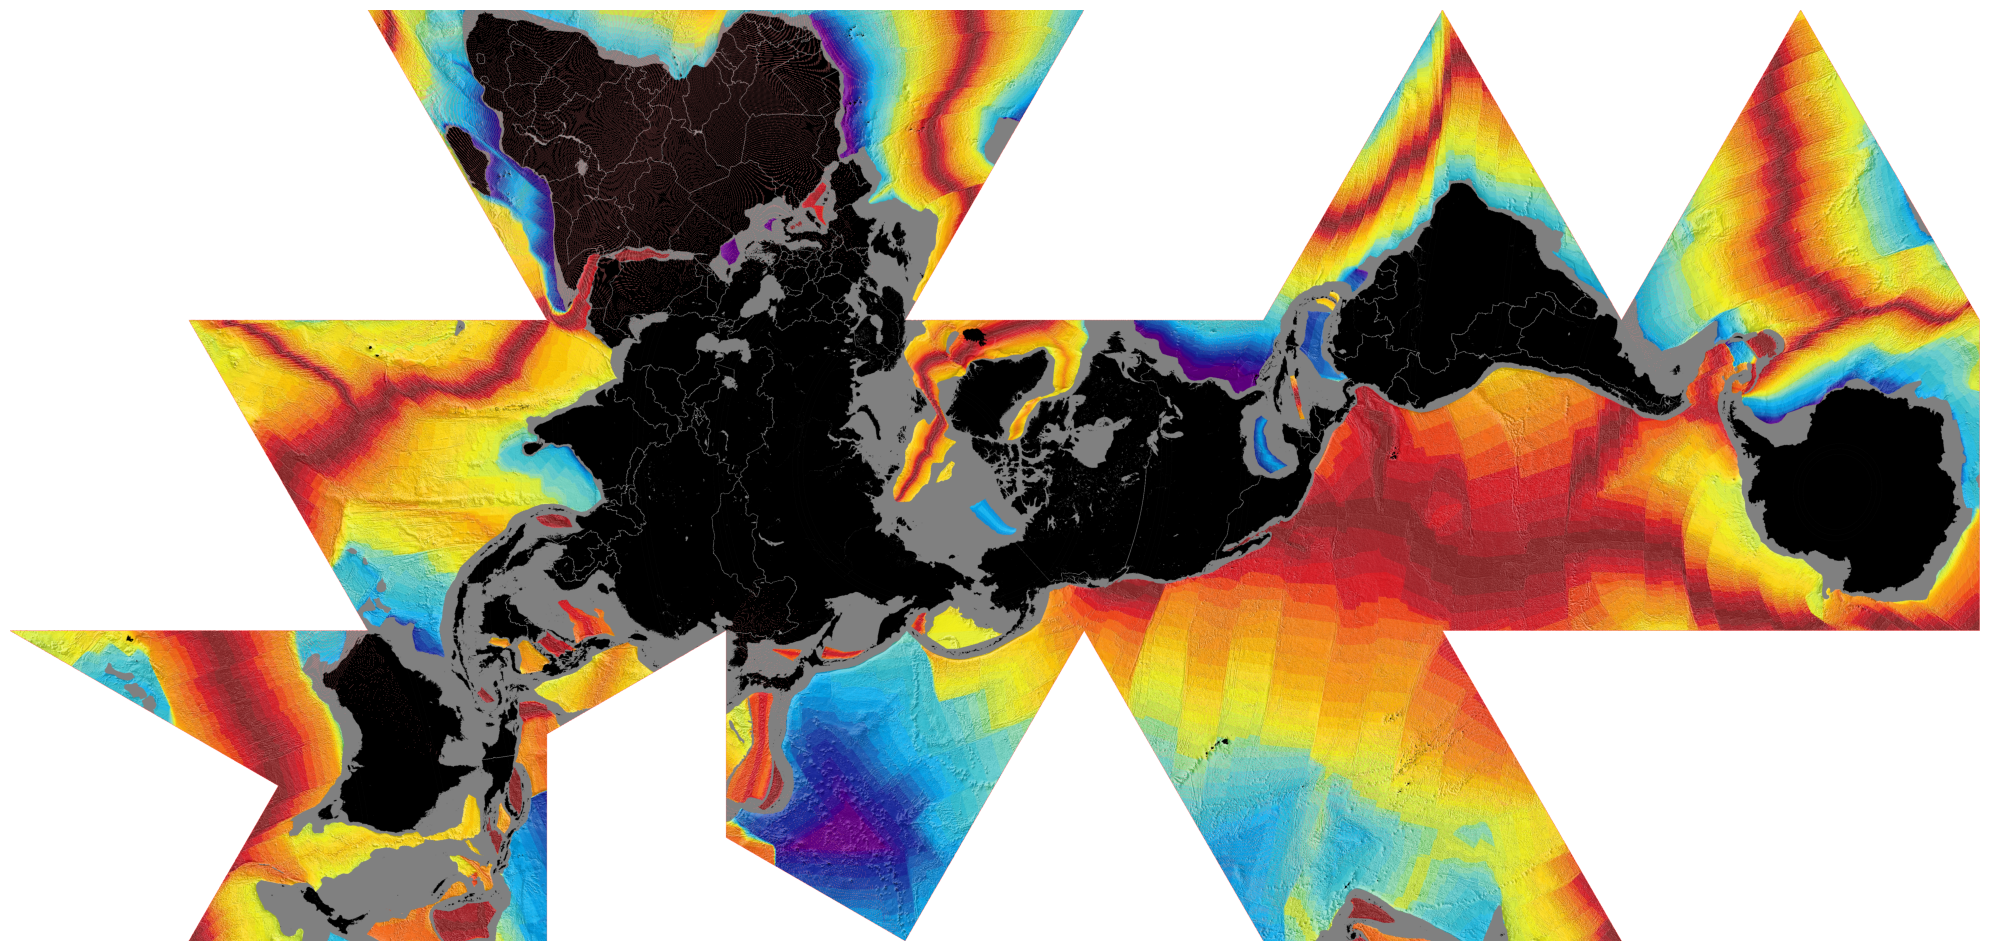

In [34]:
# increase the scale a lot so that the image stays fairly hi-res. The default will downscale it alot, and it will look a tad blurry!

dymax.convert_rectimage_2_dymaximage(output_filename, 'age_dymax.png', scale=1200, save=True)

### Print!